# Polynomial Regression

What if your data is actually more complex than a simple straight line? Surprisingly,
you can actually use a linear model to fit nonlinear data. A simple way to do this is to
add powers of each feature as new features, then train a linear model on this extended
set of features. This technique is called Polynomial Regression

In [1]:
# Some useful Imports

In [2]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
np.random.seed(42)

#### Explainining np.random

In [3]:
np.random.seed(1)
print(np.random.randn(), np.random.randn(),np.random.randn())

1.6243453636632417 -0.6117564136500754 -0.5281717522634557


In [4]:
# No arrguments gives a single random number 
np.random.randn()

-1.0729686221561705

In [5]:
m = 100
r = np.random.rand(m, 1)
r.min(), r.max(), r.size

(0.00287032703115897, 0.9888610889064947, 100)

In [6]:
# Giving values between -3 and 3 to X in a random way

#### First, let’s generate some nonlinear data, based on a simple quadratic equation (plus some noise)


#### Our equation is :  y = 0 . 5x1 2 + 1 . 0x1 + 2 . 0 + Gaussian noise.



In [7]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

## Plot the Data

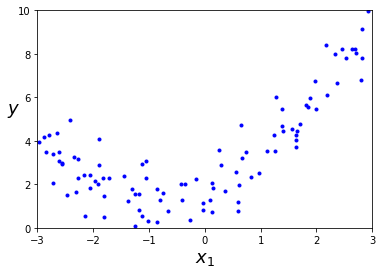

In [8]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

plt.show()

#### Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s PolynomialFeatures class to transform our training data, adding the square (2nd-degree polynomial) of each feature in the training set as new features (in this case there is just one feature):

In [9]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)


In [10]:
X[0:5]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816]])

#### X_poly now contains the original feature of X plus the square of this feature. Now you can fit a LinearRegression model to this extended training data

In [11]:
X_poly[0:5]

array([[-0.75275929,  0.56664654],
       [ 2.70428584,  7.3131619 ],
       [ 1.39196365,  1.93756281],
       [ 0.59195091,  0.35040587],
       [-2.06388816,  4.25963433]])

### Let's Fit the Data

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

#Print the intercept and coefficients
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

### Not bad ! 
#### The model estimates y = 0 . 56$x^{2}$ + 0 . 93$x$ + 1 . 78 when in fact the original function was y = 0 . 5$x^{2}$ + 1 . 0$x$ + 2 . 0 + Gaussian noise.

In [13]:
## Predict and Visualize the Fit

In [14]:
#Give X_values 100 values between -3 and 3

X_values =np.linspace(-3, 3, 100).reshape(100, 1)

# Transform X_values to create X_test (DEFAULT DEGREE is 2)
X_test = poly_features.transform(X_values)

# Predict for the transformed values
predictions = lin_reg.predict(X_test)


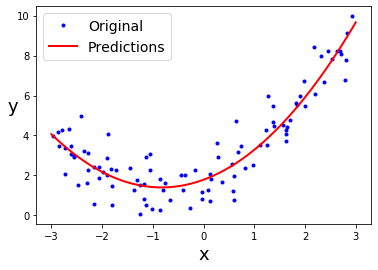

In [15]:
# quadratic_predictions_plot
plt.plot(X, y, "b.", label="Original")

# plot X_values vs predictions

plt.plot(X_values, predictions, "r-", linewidth=2, label="Predictions")
plt.xlabel("x", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

plt.show()

# Demo Over fitting

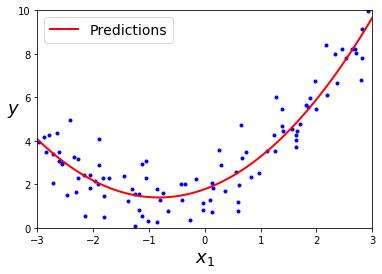

In [16]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])

plt.show()

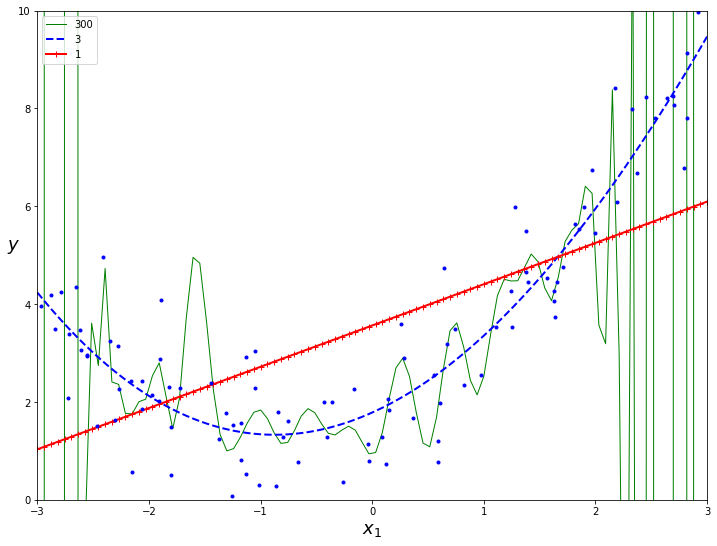

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
plt.figure(figsize=(12,9))
for style, width, degree in (("g-", 1, 300), ("b--", 2, 3), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)

plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

plt.show()

# Sine Wave Fitting

In [18]:
X = np.linspace(-np.pi, np.pi, 201)
y=np.sin(X)

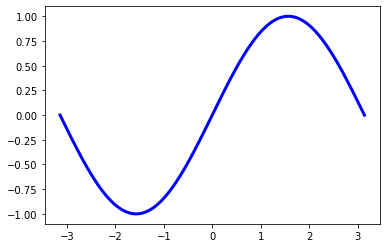

In [19]:
sns.lineplot(X,y,lw=3, color='b')
plt.show()

### Degree 3

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X.reshape(-1, 1))

In [21]:
X_poly[:3]

array([[ -3.14159265,   9.8696044 , -31.00627668],
       [ -3.11017673,   9.67319927, -30.08535926],
       [ -3.0787608 ,   9.47876807, -29.18285956]])

In [22]:
# the above values are x , x**2 and x***3

In [23]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
#Give X_values 100 values between -pi  and pi 

X_values=np.linspace(-np.pi, np.pi, 100).reshape(100, 1)
y_values = np.sin(X_values)
# Transform X_new
X_test = poly_features.transform(X_values)

# Predict for the transformed values
predictions = lin_reg.predict(X_test)

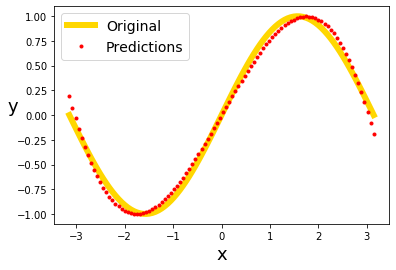

In [25]:
plt.plot(X_values, np.sin(X_values), "-",color='gold',label="Original", lw=6)
plt.plot(X_values, predictions, "r.", label="Predictions")

plt.xlabel("x", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
#plt.axis([-3, 3, 0, 10])

plt.show()

In [26]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_values, predictions))
print('MSE:', metrics.mean_squared_error(y_values, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_values, predictions)))
print('R-squared:', metrics.r2_score(y_values, predictions))


MAE: 0.05966012794669742
MSE: 0.004766349418194408
RMSE: 0.06903875301737719
R-squared: 0.990371011276375


In [27]:
lin_reg.coef_

array([ 0.8545889 ,  0.        , -0.09282343])

Let's observe the equations

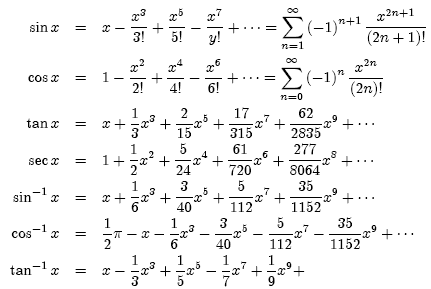

### The square term has been provided a coefficient zero - correctly so

### Additional Material

In [ ]:
## Degree 5
poly_features = PolynomialFeatures(degree=5, include_bias=False)
X_poly_new = poly_features.fit_transform(X.reshape(-1, 1))
X_poly_new[:3]

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly_new, y)

In [ ]:
#Give X_values 100 values between -pi  and pi 

X_values=np.linspace(-np.pi, np.pi, 100).reshape(100, 1)

# Transform X_new
X_test = poly_features.transform(X_values)
#X_test= X_test[:, [0,2]]
# Predict for the transformed values
predictions = lin_reg.predict(X_test)

In [ ]:
# only x and x-cube
X_test[:3]

In [ ]:
plt.plot(X, y, "b.", label="Original")
plt.plot(X_values, predictions, "r-", linewidth=2, label="Predictions")

plt.xlabel("x", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
#plt.axis([-3, 3, 0, 10])

plt.show()

In [ ]:
#Regression Evaluation Metrics
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(X_values, predictions))
print('MSE:', metrics.mean_squared_error(X_values, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(X_values, predictions)))
print('R-squared:', metrics.r2_score(X_values, predictions))


In [ ]:
lin_reg.coef_

#### .987x + 0 x**2 - 0.15 x**3 -0 x**4+.0056 x**5

#### The code below demonstrates that we can drop the 2 and 4 orders and get the same result using three features

In [ ]:
# Avoid the x-squared and x**4 term
X_poly_new = X_poly_new[:, [0,2,4]]
X_poly_new[:3]

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly_new, y)

In [ ]:
X_test = poly_features.transform(X_values)
X_test= X_test[:, [0,2,4]]
# Predict for the transformed values
predictions = lin_reg.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(X_values, predictions))
print('MSE:', metrics.mean_squared_error(X_values, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(X_values, predictions)))
print('R-squared:', metrics.r2_score(X_values, predictions))

In [ ]:
lin_reg.coef_